## Exercise - Classification Models

- In this exercise, we will try to predict the direction of stock price movements using technical indicators.
- Technical indicator?
    - Technical indicators are heuristic or pattern-based signals produced by the price, volume, and/or open interest of a security or contract used by traders who follow technical analysis.
    - By analyzing historical data, technical analysts use indicators to predict future price movements. Examples of common technical indicators include the Relative Strength Index (RSI), Money Flow Index (MFI), stochastics, moving average convergence divergence (MACD), and Bollinger Bands®.
    - For more detail (https://www.investopedia.com/terms/t/technicalindicator.asp).
    
- Data: AAPL stock (about 20y of daily data)
    - y: binary
        - 1 if price moves up
        - 0 otherwise
    - Open, High, Low, Close: Price data
    - the rest: technical indicators (about 56 indicators)
    
- Based on the procedure we have learned in class (cross-validation, hyperparameter tuning, etc), train 3 models and compare their results.

In [25]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings, statsmodels.api as sm

warnings.filterwarnings(action = 'ignore')
%matplotlib inline

df = pd.read_csv('exercise.csv', index_col = 0, parse_dates = True)
df.head()

,Open,High,Low,Close,volume,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,...,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,y
Date,,,,,,,,,,,,,,,,,,,,,
2001-04-16,0.394464,0.400000,0.372500,0.382857,2.852248e+08,0.033422,5.742850e+05,-0.000078,0.000009,-3.966024e+06,...,63.878281,-42.765900,0.016932,-3.292812,-9.519884,-3.168121,-6.351763,-4.371102,-4.469513,0.0
2001-04-17,0.378571,0.378750,0.350000,0.364286,6.851992e+08,-0.000052,-1.325588e+06,-0.000092,0.000002,-4.570397e+07,...,55.247096,-64.892923,0.015173,-9.453895,-3.299504,-3.194397,-0.105106,-4.850633,-4.972225,1.0
2001-04-18,0.385179,0.430000,0.376429,0.406964,1.100842e+09,0.062106,5.575460e+06,0.000189,0.000018,9.573291e+07,...,56.046121,-24.202816,0.016178,3.262309,7.801987,-0.995121,8.797107,11.715520,11.078545,1.0
2001-04-19,0.456250,0.459821,0.421429,0.459286,1.873670e+09,0.205960,1.878385e+07,0.000077,0.000020,3.698609e+08,...,70.158759,-0.427985,0.021710,19.129218,23.668194,3.937542,19.730652,12.856665,12.094838,0.0
2001-04-20,0.445179,0.457679,0.439286,0.447143,6.934032e+08,0.147344,1.489758e+07,0.000021,0.000025,2.225587e+08,...,88.408934,-10.142398,0.029500,23.715303,20.996967,7.349427,13.647540,-2.643890,-2.679469,0.0


하루 단위 거래 데이터를 보여준다

In [21]:
df = df.astype(float)

In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'volume', 'volume_cmf', 'volume_fi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_mfi',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_stc',
       'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_cci',
       'trend_aroon_up', 'trend_aroon_down', 'trend_aroon_ind',
       'trend_psar_up_indicator', 'trend_psar_down_indicator', 'momentum_rsi',
       'momentum_stoch_rsi', 'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d',
       'momentum_tsi', 'momentum_uo', 'momentum_stoch',
       'momentum_stoch_signal',

- 트랜드 : 주가 추세

- 볼륨 : 거래량

- volatility : 변동성

In [23]:
df

,Open,High,Low,Close,volume,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,...,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,y
Date,,,,,,,,,,,,,,,,,,,,,
2001-04-16,0.394464,0.400000,0.372500,0.382857,2.852248e+08,0.033422,5.742850e+05,-0.000078,0.000009,-3.966024e+06,...,63.878281,-42.765900,0.016932,-3.292812,-9.519884,-3.168121,-6.351763,-4.371102,-4.469513,0.0
2001-04-17,0.378571,0.378750,0.350000,0.364286,6.851992e+08,-0.000052,-1.325588e+06,-0.000092,0.000002,-4.570397e+07,...,55.247096,-64.892923,0.015173,-9.453895,-3.299504,-3.194397,-0.105106,-4.850633,-4.972225,1.0
2001-04-18,0.385179,0.430000,0.376429,0.406964,1.100842e+09,0.062106,5.575460e+06,0.000189,0.000018,9.573291e+07,...,56.046121,-24.202816,0.016178,3.262309,7.801987,-0.995121,8.797107,11.715520,11.078545,1.0
2001-04-19,0.456250,0.459821,0.421429,0.459286,1.873670e+09,0.205960,1.878385e+07,0.000077,0.000020,3.698609e+08,...,70.158759,-0.427985,0.021710,19.129218,23.668194,3.937542,19.730652,12.856665,12.094838,0.0
2001-04-20,0.445179,0.457679,0.439286,0.447143,6.934032e+08,0.147344,1.489758e+07,0.000021,0.000025,2.225587e+08,...,88.408934,-10.142398,0.029500,23.715303,20.996967,7.349427,13.647540,-2.643890,-2.679469,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,8.822370e+07,0.126659,1.111850e+08,-0.794857,1.163359,4.192348e+06,...,81.249492,-24.193523,7.760088,5.826268,4.975333,1.170186,3.805147,-0.697602,-0.700047,1.0
2020-12-24,131.320007,133.460007,131.100006,131.970001,5.493010e+07,0.117849,1.032270e+08,2.900096,1.468963,-1.918168e+05,...,80.317913,-17.110814,8.041295,6.102271,0.137360,0.963620,-0.826261,0.771224,0.768265,1.0
2020-12-28,133.990005,137.339996,133.509995,136.690002,1.244862e+08,0.160401,1.724196e+08,9.676023,1.926954,4.875972e+06,...,84.971476,-3.781234,9.081940,12.243393,1.309357,1.032768,0.276589,3.576571,3.514097,0.0


In [27]:
# unit root test

from statsmodels.tsa.stattools import adfuller

adfuller(df['volume'])

(-3.394341226034381,
 0.011153298106333925,
 31,
 4928,
 {'1%': -3.43167766021121,
  '5%': -2.8621266803613676,
  '10%': -2.5670822909919067},
 202187.30015833507)

ADF 검정 결과, p value가 0.01115이므로 사용해도 괜찮은 시계열 데이터이다

In [28]:
for col in df.columns :
    if adfuller(df[col])[1] > 0.05 :
        print(col)

Open
High
Low
Close


In [32]:
df = df.iloc[:,4:]

In [33]:
df

,volume,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_mfi,volatility_bbw,volatility_bbp,volatility_bbhi,...,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,y
Date,,,,,,,,,,,,,,,,,,,,,
2001-04-16,2.852248e+08,0.033422,5.742850e+05,-0.000078,0.000009,-3.966024e+06,50.802720,19.067356,0.516560,0.0,...,63.878281,-42.765900,0.016932,-3.292812,-9.519884,-3.168121,-6.351763,-4.371102,-4.469513,0.0
2001-04-17,6.851992e+08,-0.000052,-1.325588e+06,-0.000092,0.000002,-4.570397e+07,40.659394,19.206630,0.264983,0.0,...,55.247096,-64.892923,0.015173,-9.453895,-3.299504,-3.194397,-0.105106,-4.850633,-4.972225,1.0
2001-04-18,1.100842e+09,0.062106,5.575460e+06,0.000189,0.000018,9.573291e+07,54.802767,18.488256,0.819330,0.0,...,56.046121,-24.202816,0.016178,3.262309,7.801987,-0.995121,8.797107,11.715520,11.078545,1.0
2001-04-19,1.873670e+09,0.205960,1.878385e+07,0.000077,0.000020,3.698609e+08,63.360985,23.896629,1.252648,1.0,...,70.158759,-0.427985,0.021710,19.129218,23.668194,3.937542,19.730652,12.856665,12.094838,0.0
2001-04-20,6.934032e+08,0.147344,1.489758e+07,0.000021,0.000025,2.225587e+08,69.887058,26.946399,1.018571,1.0,...,88.408934,-10.142398,0.029500,23.715303,20.996967,7.349427,13.647540,-2.643890,-2.679469,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,8.822370e+07,0.126659,1.111850e+08,-0.794857,1.163359,4.192348e+06,50.455762,13.477446,0.909774,0.0,...,81.249492,-24.193523,7.760088,5.826268,4.975333,1.170186,3.805147,-0.697602,-0.700047,1.0
2020-12-24,5.493010e+07,0.117849,1.032270e+08,2.900096,1.468963,-1.918168e+05,54.867918,13.079883,0.932572,0.0,...,80.317913,-17.110814,8.041295,6.102271,0.137360,0.963620,-0.826261,0.771224,0.768265,1.0
2020-12-28,1.244862e+08,0.160401,1.724196e+08,9.676023,1.926954,4.875972e+06,56.287610,13.907079,1.115758,1.0,...,84.971476,-3.781234,9.081940,12.243393,1.309357,1.032768,0.276589,3.576571,3.514097,0.0


In [35]:
#standardize

# (1) fit_transform the whole data

# (2) fit on the train data

# -> 둘중에 하나만써도 맞는걸로 함

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
y = df['y']
X = df.drop('y', axis = 1)
X = pd.DataFrame(scaler.fit_transform(X), index = X.index, columns = X.columns)

In [38]:
X.describe()

,volume,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_mfi,volatility_bbw,volatility_bbp,volatility_bbhi,...,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr
count,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,...,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03,4.960000e+03
mean,1.226617e-17,1.420882e-17,-2.829278e-17,-6.983661e-18,2.865092e-18,2.137907e-17,3.447791e-16,-4.132881e-16,2.234100e-16,1.166853e-16,...,-9.827488e-17,-2.784287e-16,-1.425047e-16,1.470150e-16,5.873438e-17,1.519842e-17,1.293768e-17,4.650178e-18,-1.138202e-17,1.005020e-17
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,...,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-1.049174e+00,-3.125000e+00,-9.276928e+00,-2.694955e+01,-1.943351e+01,-1.409733e+01,-3.272445e+00,-1.450088e+00,-2.942661e+00,-2.997839e-01,...,-1.938094e+00,-2.052598e+00,-1.938094e+00,-6.835452e+00,-5.006985e+00,-2.410512e+00,-2.331232e+00,-2.626292e+00,-7.946790e+00,-8.736479e+00
25%,-7.130809e-01,-7.015051e-01,-1.699846e-01,-1.610085e-02,-4.188937e-02,-1.605836e-01,-7.124725e-01,-7.033902e-01,-8.026344e-01,-2.997839e-01,...,-8.750617e-01,-8.967367e-01,-8.750617e-01,-2.314921e-01,-5.819185e-01,-7.322767e-01,-7.621247e-01,-6.750314e-01,-4.787295e-01,-4.691503e-01
50%,-3.081049e-01,-1.792156e-02,-2.210140e-03,-1.436972e-02,-4.000894e-02,-2.973432e-02,4.948029e-02,-2.073346e-01,1.661955e-01,-2.997839e-01,...,2.020326e-01,2.110683e-01,2.020326e-01,-1.581174e-01,7.329626e-03,-1.469184e-01,-1.021778e-01,-1.168550e-01,-2.134710e-02,-9.964204e-03
75%,3.966959e-01,7.048050e-01,2.967975e-01,-8.334262e-03,-3.128848e-02,1.367853e-01,7.186784e-01,4.527882e-01,8.043731e-01,-2.997839e-01,...,9.168364e-01,9.065664e-01,9.168364e-01,1.155563e-01,6.118299e-01,6.110637e-01,6.625982e-01,5.092057e-01,4.881765e-01,4.959863e-01
max,7.614403e+00,2.932644e+00,1.041094e+01,1.642105e+01,9.348871e+00,1.171534e+01,2.744631e+00,6.397659e+00,2.483725e+00,3.335737e+00,...,1.329877e+00,1.392844e+00,1.329877e+00,9.233003e+00,4.967300e+00,4.441369e+00,3.632757e+00,6.292246e+00,6.054654e+00,5.674554e+00


평균 0, 표준편차 1에 모여있음 -> 정규화가 잘 되었음

**Logistic Regression**

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.datasets import make_moons
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [42]:
penalties = ['l1', 'l2', 'elasticnet', 'none']
intercepts = [True, False]
C = [0.001, 0.01, 0.1, 0., 1.0, 10.0, 100.0, 1000.0]
model = LogisticRegression()

hyperparameters = {'fit_intercept':intercepts,
                   'penalty':penalties,
                   'C':C}

gsearch = GridSearchCV(model, hyperparameters, verbose=1)
gsearch.fit(X_train, y_train, )

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    6.4s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0, 1000.0],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=1)

In [10]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.48      0.13      0.21       708
         1.0       0.52      0.87      0.65       780

    accuracy                           0.52      1488
   macro avg       0.50      0.50      0.43      1488
weighted avg       0.50      0.52      0.44      1488



In [6]:
accuracy_score(y, predicted)

0.5235887096774193

In [7]:
cross_val_score(LogisticRegression(), X, y, scoring = 'accuracy', cv = 10)

array([0.54032258, 0.52822581, 0.52016129, 0.52419355, 0.52419355,
       0.50604839, 0.52620968, 0.52822581, 0.48991935, 0.53830645])

In [9]:
lg.fit(X_train, y_train)
predicted = lg.predict(X_test)
accuracy_score(y_test, predicted)

0.5181451612903226

In [11]:
criterion = ['gini', 'entropy']
maxdepth = [3,5,10,20]
minsampleleafs = [0.005 ,0.01, 0.05, 0.10]

model = DecisionTreeClassifier(random_state=42)

hyperparameters = {'criterion': criterion,
                   'max_depth': maxdepth,
                   'min_samples_leaf':minsampleleafs
                  }

y = df.iloc[:,-1]
X = df.iloc[:,4:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gsearch = GridSearchCV(model, hyperparameters, verbose=1)
gsearch.fit(X_train, y_train, )

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    9.4s finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [0.005, 0.01, 0.05, 0.1]},
             verbose=1)

In [12]:
gsearch.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 0.1}

In [13]:
mod = gsearch.best_estimator_.fit(X_train, y_train)
accuracy_score(y_test, mod.predict(X_test))

0.5309139784946236

In [14]:
print(classification_report(y_test, mod.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.53      0.14      0.22       708
         1.0       0.53      0.89      0.66       780

    accuracy                           0.53      1488
   macro avg       0.53      0.51      0.44      1488
weighted avg       0.53      0.53      0.45      1488



In [15]:
print(confusion_matrix(y_test, mod.predict(X_test)))

[[ 99 609]
 [ 89 691]]


**SVM**

In [43]:
from sklearn.model_selection import GridSearchCV

C = [0.01, 0.1, 0., 1.0, 10.0]
degrees = [2,3,5]
coefs = [0,1,10]
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels = ['rbf', 'sigmoid']
gammas = ['scale', 'auto']
model = SVC()

hyperparameters = { 'kernel': kernels,
                   'coef0': coefs,
                   'degree':degrees,
                   'gamma': gammas,
                   'C':C}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gsearch = GridSearchCV(model, hyperparameters, verbose=5)
gsearch.fit(X_train, y_train, )

# verbose에 따라서 얼마나 정교하게 돌릴지 설정이 가능하다

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf, score=0.524, total=   0.5s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf ..............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=0, degree=2, gamma=auto, kernel=rbf ...............
[CV]  C=0.01, coef0=0, degree=2, gamma=auto,

[CV]  C=0.01, coef0=0, degree=5, gamma=auto, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=0, degree=5, gamma=auto, kernel=sigmoid ...........
[CV]  C=0.01, coef0=0, degree=5, gamma=auto, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=0, degree=5, gamma=auto, kernel=sigmoid ...........
[CV]  C=0.01, coef0=0, degree=5, gamma=auto, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=1, degree=2, gamma=scale, kernel=rbf ..............
[CV]  C=0.01, coef0=1, degree=2, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=2, gamma=scale, kernel=rbf ..............
[CV]  C=0.01, coef0=1, degree=2, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=2, gamma=scale, kernel=rbf ..............
[CV]  C=0.01, coef0=1, degree=2, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=2, gamma=scale, kernel=rbf ..............
[CV]  C=0.01, coef0=1, degree=2, gamma=scale, kernel=rb

[CV]  C=0.01, coef0=1, degree=5, gamma=scale, kernel=sigmoid, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=0.01, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=1, degree=5, gamma=auto, kernel=sigmoid ...........
[CV]  C=0.01, coef0=1, degree=5, gamma=auto, kernel=sigmoid, scor

[CV]  C=0.01, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=10, degree=5, gamma=scale, kernel=rbf .............
[CV]  C=0.01, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=10, degree=5, gamma=scale, kernel=rbf .............
[CV]  C=0.01, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=10, degree=5, gamma=scale, kernel=rbf .............
[CV]  C=0.01, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.01, coef0=10, degree=5, gamma=scale, kernel=sigmoid .........
[CV]  C=0.01, coef0=10, degree=5, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=10, degree=5, gamma=scale, kernel=sigmoid .........
[CV]  C=0.01, coef0=10, degree=5, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.01, coef0=10, degree=5, gamma=scale, kernel=sigmoid .........
[CV]  C=0.01, coef0=10, degree=5, gamma=scale, ker

[CV]  C=0.1, coef0=0, degree=3, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid ............
[CV]  C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid, score=0.519, total=   0.6s
[CV] C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid ............
[CV]  C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid ............
[CV]  C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid, score=0.510, total=   0.5s
[CV] C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid ............
[CV]  C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid, score=0.517, total=   0.5s
[CV] C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid ............
[CV]  C=0.1, coef0=0, degree=3, gamma=auto, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.1, coef0=0, degree=5, gamma=scale, kernel=rbf ...............
[CV]  C=0.1, coef0=0, degree=5, gamma=scale, kernel=rbf,

[CV]  C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid, score=0.497, total=   0.3s
[CV] C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid ...........
[CV]  C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid, score=0.506, total=   0.3s
[CV] C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid ...........
[CV]  C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid, score=0.480, total=   0.3s
[CV] C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf ................
[CV]  C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf ................
[CV]  C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf ................
[CV]  C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf ................
[CV]  C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf, score

[CV]  C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf ..............
[CV]  C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf ..............
[CV]  C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf ..............
[CV]  C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf ..............
[CV]  C=0.1, coef0=10, degree=3, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=0.1, coef0=10, degree=3, gamma=scale, kernel=sigmoid ..........
[CV]  C=0.1, coef0=10, degree=3, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=0.1, coef0=10, degree=3, gamma=scale, kernel=sigmoid ..........
[CV]  C=0.1, coef0=10, degree=3, gamma=scale, kernel=sigmoid

[CV]  C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid, score=nan, total=   0.0s
[CV] C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid ............
[CV]  C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid, score=nan, total=   0.0s
[CV] C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid ............
[CV]  C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid, score=nan, total=   0.0s
[CV] C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf ...............
[CV]  C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf ...............
[CV]  C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf ...............
[CV]  C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf ...............
[CV]  C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf, score=nan, total

[CV]  C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf ...............
[CV]  C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf ...............
[CV]  C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf ...............
[CV]  C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf ...............
[CV]  C=0.0, coef0=10, degree=3, gamma=auto, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.0, coef0=10, degree=3, gamma=auto, kernel=sigmoid ...........
[CV]  C=0.0, coef0=10, degree=3, gamma=auto, kernel=sigmoid, score=nan, total=   0.0s
[CV] C=0.0, coef0=10, degree=3, gamma=auto, kernel=sigmoid ...........
[CV]  C=0.0, coef0=10, degree=3, gamma=auto, kernel=sigmoid, score=nan, total=

[CV]  C=1.0, coef0=0, degree=3, gamma=scale, kernel=rbf, score=0.535, total=   0.4s
[CV] C=1.0, coef0=0, degree=3, gamma=scale, kernel=rbf ...............
[CV]  C=1.0, coef0=0, degree=3, gamma=scale, kernel=rbf, score=0.529, total=   0.4s
[CV] C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid, score=0.491, total=   0.3s
[CV] C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid, score=0.496, total=   0.3s
[CV] C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid, score=0.478, total=   0.3s
[CV] C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid, score=0.487, total=   0.3s
[CV] C=1.0, coef0=0, degree=3, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, coef0=0, degree=3, gamma=scale, kernel=si

[CV]  C=1.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid, score=0.499, total=   0.3s
[CV] C=1.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid ............
[CV]  C=1.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid, score=0.496, total=   0.2s
[CV] C=1.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid ............
[CV]  C=1.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid, score=0.499, total=   0.2s
[CV] C=1.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid ............
[CV]  C=1.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid, score=0.481, total=   0.2s
[CV] C=1.0, coef0=1, degree=3, gamma=scale, kernel=rbf ...............
[CV]  C=1.0, coef0=1, degree=3, gamma=scale, kernel=rbf, score=0.529, total=   0.4s
[CV] C=1.0, coef0=1, degree=3, gamma=scale, kernel=rbf ...............
[CV]  C=1.0, coef0=1, degree=3, gamma=scale, kernel=rbf, score=0.524, total=   0.4s
[CV] C=1.0, coef0=1, degree=3, gamma=scale, kernel=rbf ...............
[CV]  C=1.0, coef0=1, degree=3, gamma=scale, kernel=rbf, s

[CV]  C=1.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf ...............
[CV]  C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf, score=0.528, total=   0.4s
[CV] C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf ...............
[CV]  C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf, score=0.524, total=   0.4s
[CV] C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf ...............
[CV]  C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf, score=0.537, total=   0.4s
[CV] C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf ...............
[CV]  C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf, score=0.536, total=   0.4s
[CV] C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf ...............
[CV]  C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf, score=0.530, total=   0.4s
[CV] C=1.0, coef0=10, degree=2, gamma=auto, kernel=sigmoid ...........
[CV]  C=1.0, coef0=10, degree=2, gamma=auto, kernel=sigmoid, scor

[CV]  C=10.0, coef0=0, degree=2, gamma=scale, kernel=rbf, score=0.514, total=   0.4s
[CV] C=10.0, coef0=0, degree=2, gamma=scale, kernel=rbf ..............
[CV]  C=10.0, coef0=0, degree=2, gamma=scale, kernel=rbf, score=0.533, total=   0.5s
[CV] C=10.0, coef0=0, degree=2, gamma=scale, kernel=rbf ..............
[CV]  C=10.0, coef0=0, degree=2, gamma=scale, kernel=rbf, score=0.509, total=   0.5s
[CV] C=10.0, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=10.0, coef0=0, degree=2, gamma=scale, kernel=sigmoid, score=0.521, total=   0.3s
[CV] C=10.0, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=10.0, coef0=0, degree=2, gamma=scale, kernel=sigmoid, score=0.495, total=   0.3s
[CV] C=10.0, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=10.0, coef0=0, degree=2, gamma=scale, kernel=sigmoid, score=0.480, total=   0.3s
[CV] C=10.0, coef0=0, degree=2, gamma=scale, kernel=sigmoid ..........
[CV]  C=10.0, coef0=0, degree=2, gamma=scale, kernel

[CV]  C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid, score=0.521, total=   0.3s
[CV] C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid ...........
[CV]  C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid, score=0.499, total=   0.3s
[CV] C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid ...........
[CV]  C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid, score=0.481, total=   0.3s
[CV] C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid ...........
[CV]  C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid, score=0.478, total=   0.3s
[CV] C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid ...........
[CV]  C=10.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid, score=0.526, total=   0.3s
[CV] C=10.0, coef0=1, degree=2, gamma=scale, kernel=rbf ..............
[CV]  C=10.0, coef0=1, degree=2, gamma=scale, kernel=rbf, score=0.528, total=   0.4s
[CV] C=10.0, coef0=1, degree=2, gamma=scale, kernel=rbf ..............
[CV]  C=10.0, coef0=1, degree=2, gamma=scale, ker

[CV]  C=10.0, coef0=1, degree=5, gamma=scale, kernel=sigmoid, score=0.499, total=   0.2s
[CV] C=10.0, coef0=1, degree=5, gamma=scale, kernel=sigmoid ..........
[CV]  C=10.0, coef0=1, degree=5, gamma=scale, kernel=sigmoid, score=0.499, total=   0.2s
[CV] C=10.0, coef0=1, degree=5, gamma=scale, kernel=sigmoid ..........
[CV]  C=10.0, coef0=1, degree=5, gamma=scale, kernel=sigmoid, score=0.483, total=   0.2s
[CV] C=10.0, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=10.0, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.527, total=   0.4s
[CV] C=10.0, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=10.0, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.515, total=   0.4s
[CV] C=10.0, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=10.0, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.513, total=   0.4s
[CV] C=10.0, coef0=1, degree=5, gamma=auto, kernel=rbf ...............
[CV]  C=10.0, coef0=1, degree=5, gamma=auto, kernel=rbf

[CV]  C=10.0, coef0=10, degree=3, gamma=auto, kernel=sigmoid, score=0.524, total=   0.5s
[CV] C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf .............
[CV]  C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.528, total=   0.4s
[CV] C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf .............
[CV]  C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.515, total=   0.4s
[CV] C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf .............
[CV]  C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.514, total=   0.4s
[CV] C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf .............
[CV]  C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.533, total=   0.4s
[CV] C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf .............
[CV]  C=10.0, coef0=10, degree=5, gamma=scale, kernel=rbf, score=0.509, total=   0.4s
[CV] C=10.0, coef0=10, degree=5, gamma=scale, kernel=sigmoid .........
[CV]  C=10.0, coef0=10, degree=5, gamma=scale, kernel=s

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  4.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.0, 1.0, 10.0], 'coef0': [0, 1, 10],
                         'degree': [2, 3, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=5)

In [44]:
gsearch.best_params_

{'C': 1.0, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [45]:
mod = gsearch.best_estimator_.fit(X_train, y_train)
accuracy_score(y_test, mod.predict(X_test))

0.5228494623655914

In [46]:
print(classification_report(y_test, mod.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.50      0.35      0.41       708
         1.0       0.54      0.68      0.60       780

    accuracy                           0.52      1488
   macro avg       0.52      0.51      0.50      1488
weighted avg       0.52      0.52      0.51      1488



In [47]:
print(confusion_matrix(y_test, mod.predict(X_test)))

[[245 463]
 [247 533]]


**Random Forest**

In [48]:
nestimators = [10,20,50,100]
criterion = ['gini', 'entropy']
maxdepth = [3,5,10,20]
minsampleleafs = [0.005 ,0.01, 0.05, 0.10]
maxfeatures = [2,3,5,11]

model = RandomForestClassifier(random_state=42)

hyperparameters = {'n_estimators': nestimators,
                   'max_features': maxfeatures,
                   'criterion': criterion,
                   'max_depth': maxdepth,
                   'min_samples_leaf':minsampleleafs
                  }

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gsearch = GridSearchCV(model, hyperparameters, verbose=1)
gsearch.fit(X_train, y_train, )

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2560 out of 2560 | elapsed:  7.7min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20],
                         'max_features': [2, 3, 5, 11],
                         'min_samples_leaf': [0.005, 0.01, 0.05, 0.1],
                         'n_estimators': [10, 20, 50, 100]},
             verbose=1)

In [49]:
print(classification_report(y_test, mod.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.50      0.35      0.41       708
         1.0       0.54      0.68      0.60       780

    accuracy                           0.52      1488
   macro avg       0.52      0.51      0.50      1488
weighted avg       0.52      0.52      0.51      1488



In [50]:
print(confusion_matrix(y_test, mod.predict(X_test)))

[[245 463]
 [247 533]]


**Differentiation**

$$X_t - X_{t-1} = (1-L)^d X_t$$

일반적인 차분은 d=1이지만, 금융시장 데이터에서는 정수차분이 아닌 분수차분 혹은 1보다 작은 수로 차분을 한다는 측도 있다.

In [52]:
df0 = pd.read_csv('exercise.csv', index_col = 0, parse_dates = True)

In [54]:
price = df0.iloc[:,:4]

In [60]:
price['rtn'] = np.log(price['Close']) - np.log(price['Close'].shift(1))
price = price.dropna()
price

,Open,High,Low,Close,rtn
Date,,,,,
2001-04-17,0.378571,0.378750,0.350000,0.364286,-0.049722
2001-04-18,0.385179,0.430000,0.376429,0.406964,0.110785
2001-04-19,0.456250,0.459821,0.421429,0.459286,0.120948
2001-04-20,0.445179,0.457679,0.439286,0.447143,-0.026795
2001-04-23,0.434643,0.446429,0.428571,0.433036,-0.032058
...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,-0.007000
2020-12-24,131.320007,133.460007,131.100006,131.970001,0.007683
2020-12-28,133.990005,137.339996,133.509995,136.690002,0.035141


<AxesSubplot:xlabel='Date'>

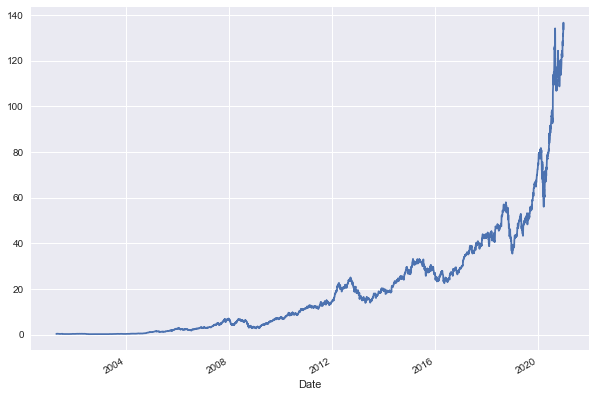

In [59]:
plt.style.use('seaborn')
price.Close.plot(figsize = (10,7))

<AxesSubplot:xlabel='Date'>

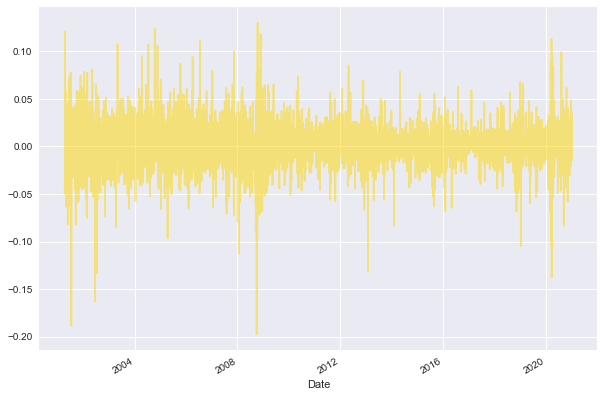

In [65]:
price.rtn.plot(figsize = (10,7), color = 'gold', alpha = 0.5)

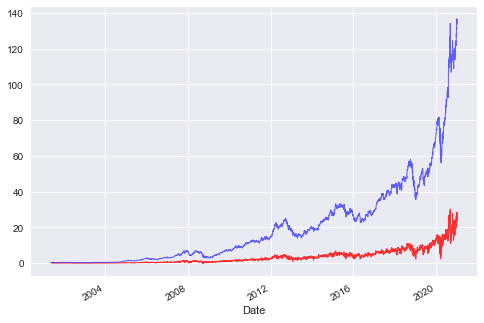

array([[1.        , 0.98627788],
       [0.98627788, 1.        ]])

In [84]:
def getWeights_FFD(d, size, thres):
    w = [1.]    # w의 초깃값 = 1
    for k in range(1, size):
        w_ = -w[-1] * (d - k + 1) / k      # 식 2)를 사용했다.
        
        if abs(w[-1]) >= thres and abs(w_) <= thres:
            break
        else:
            w.append(w_)
    
    # w의 inverse
    w = np.array(w[::-1]).reshape(-1, 1)
    return w

# thres = 0.002로 하면 d=0.5일 때 len(w) = 28 (1.3 개월 정도)
def fracDiff_FFD(series, d, thres = 0.002):
    '''
    Constant width window (new solution)
    Note 1: thres determines the cut-off weight for the window
    Note 2: d can be any positive fractional, not necessarily bounded [0,1]
    '''
    # 1) Compute weights for the longest series
    w = getWeights_FFD(d, series.shape[0], thres)
    width = len(w) - 1
    
    # 2) Apply weights to values
    df = {}
    for name in series.columns:
        seriesF = series[[name]].fillna(method = 'ffill').dropna()
        df_ = pd.Series()
        
        for iloc1 in range(width, seriesF.shape[0]):
            loc0 = seriesF.index[iloc1 - width]
            loc1 = seriesF.index[iloc1]
            
            if not np.isfinite(series.loc[loc1, name]):
                continue   # exclude NAs
            
            df_[loc1] = np.dot(w.T, seriesF.loc[loc0:loc1])[0,0]
        df[name] = df_.copy(deep = True)
    df = pd.concat(df, axis = 1)
    return df, w

# 주가 시계열을 읽어온다.
stock = price

# 실수 차원의 차분 시계열을 계산한다.
fdiff, w = fracDiff_FFD(stock, d=0.4, thres=0.002)
fdiff['Close'].plot(linewidth=1.0, color='red', alpha = 0.8)

# 원 시계열인 주가 차트를 그린다.
stock['Close'].iloc[(len(w) - 1):].plot(linewidth=1.0, color='blue', alpha = 0.6)
plt.show()

# correlation
np.corrcoef(fdiff['Close'], stock['Close'].iloc[(len(w) - 1):])

In [85]:
fdiff # 차분시계열

,Open,High,Low,Close,rtn
2001-06-04,0.060786,0.051886,0.056752,0.050003,-0.022016
2001-06-05,0.051170,0.052291,0.052252,0.056614,0.017511
2001-06-06,0.055114,0.050243,0.052601,0.051851,-0.013018
2001-06-07,0.051207,0.066135,0.055490,0.070271,0.048553
2001-06-08,0.070061,0.060918,0.059917,0.058451,-0.031130
...,...,...,...,...,...
2020-12-23,25.346236,23.744447,25.385108,23.699352,-0.020211
2020-12-24,23.571779,24.758765,24.582108,24.478453,0.005827
2020-12-28,26.111858,28.000045,26.353925,28.546158,0.030108
2020-12-29,28.898607,27.584887,25.852087,24.516443,-0.029968


In [86]:
stock # 원시계열

,Open,High,Low,Close,rtn
Date,,,,,
2001-04-17,0.378571,0.378750,0.350000,0.364286,-0.049722
2001-04-18,0.385179,0.430000,0.376429,0.406964,0.110785
2001-04-19,0.456250,0.459821,0.421429,0.459286,0.120948
2001-04-20,0.445179,0.457679,0.439286,0.447143,-0.026795
2001-04-23,0.434643,0.446429,0.428571,0.433036,-0.032058
...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,-0.007000
2020-12-24,131.320007,133.460007,131.100006,131.970001,0.007683
2020-12-28,133.990005,137.339996,133.509995,136.690002,0.035141


In [87]:
fdiff.Close

2001-06-04     0.050003
2001-06-05     0.056614
2001-06-06     0.051851
2001-06-07     0.070271
2001-06-08     0.058451
                ...    
2020-12-23    23.699352
2020-12-24    24.478453
2020-12-28    28.546158
2020-12-29    24.516443
2020-12-30    23.299616
Name: Close, Length: 4926, dtype: float64

In [88]:
adfuller(fdiff.Close)

(2.6911673589803686,
 0.9990865018807624,
 30,
 4895,
 {'1%': -3.431686615429739,
  '5%': -2.8621306366977115,
  '10%': -2.567084397109473},
 9790.47780740128)

In [91]:
df['fdiff'] = fdiff.Close

In [93]:
df = df.dropna()

In [94]:
df.columns

Index(['volume', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_mfi', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_dpo', 'trend_kst', 'trend_kst_sig',
       'trend_kst_diff', 'trend_stc', 'trend_adx', 'trend_adx_pos',
       'trend_adx_neg', 'trend_cci', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind', 'trend_psar_up_indicator',
       'trend_psar_down_indicator', 'momentum_rsi', 'momentum_stoch_rsi',
       'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_tsi',
       'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ao', '

In [95]:
X = df.iloc[:,:-2]
X = sm.add_constant(X)
y = df.iloc[:,-1]
olsmodel = sm.OLS(y,X).fit()

In [96]:
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fdiff   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     200.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:16:16   Log-Likelihood:                -11370.
No. Observations:                4926   AIC:                         2.284e+04
Df Residuals:                    4875   BIC:                         2.317e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0024      0.000      5.547      0.000       0.002       0.003
volume                    -4.401e-09   1.24e-10    -35.556      0.000   -4.64e-09   -4.16e-09
volume_cmf                   -0.6306      0.420     -1.503      0.133      -1.453       0.192
volume_fi                 -1.662e-08   1.32e-09    -12.572      0.000   -1.92e-08    -1.4e-08
volume_em                     0.3998      0.039     10.236      0.000       0.323       0.476
volume_sma_em                -2.5893      0.232    -11.175      0.000      -3.044      -2.135
volume_vpt                 5.487e-09   1.38e-09      3.979      0.000    2.78e-09    8.19e-09
volume_mfi                   -0.0113      0.005     -2.212      0.027      -0.021      -0.001
volatility_bbw               -0.0583      0.016     -3.702      0.000      -0.089      -0.027
volatility_bbp               -2.0895      1.136     -1.839      0.066      -4.317       0.138
volatility_bbhi              -0.2815      0.179     -1.574      0.115      -0.632       0.069
volatility_bbli              -0.2214      0.231     -0.957      0.339      -0.675       0.232
volatility_kcw               -0.2530      0.033     -7.676      0.000      -0.318      -0.188
volatility_kcp               -0.0454      0.280     -0.162      0.871      -0.594       0.504
volatility_kchi               0.1358      0.137      0.994      0.320      -0.132       0.404
volatility_kcli              -0.4192      0.154     -2.730      0.006      -0.720      -0.118
volatility_dcw                0.0969      0.020      4.919      0.000       0.058       0.136
volatility_dcp               -0.2374      0.633     -0.375      0.708      -1.479       1.004
volatility_ui                -0.0147      0.040     -0.369      0.712      -0.093       0.063
trend_macd                   11.2589      0.350     32.133      0.000      10.572      11.946
trend_macd_signal             1.1680      0.128      9.099      0.000       0.916       1.420
trend_macd_diff              10.0909      0.405     24.914      0.000       9.297      10.885
trend_vortex_ind_pos         -8.2542      0.538    -15.330      0.000      -9.310      -7.199
trend_vortex_ind_neg         -7.5813      0.539    -14.066      0.000      -8.638      -6.525
trend_vortex_ind_diff        -0.6729      0.238     -2.825      0.005      -1.140      -0.206
trend_trix                   -5.1659      1.099     -4.702      0.000      -7.320      -3.012
trend_mass_index              0.1637      0.050      3.292      0.001       0.066       0.261
trend_dpo                     0.1333      0.055      2.420      0.016       0.025       0.241
trend_kst                     0.0139      0.003      5.509      0.000       0.009       0.019
trend_kst_sig                 0.0026      0.003      1.049      0.294      

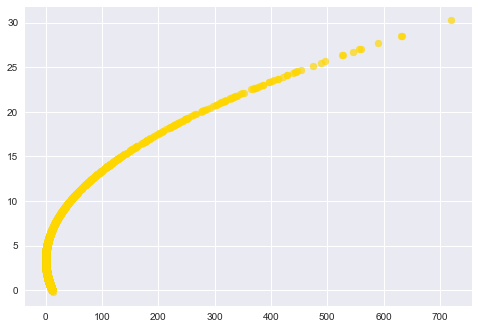

In [132]:
plt.scatter((y - y.mean())**2, y, color = 'gold', alpha = 0.7)

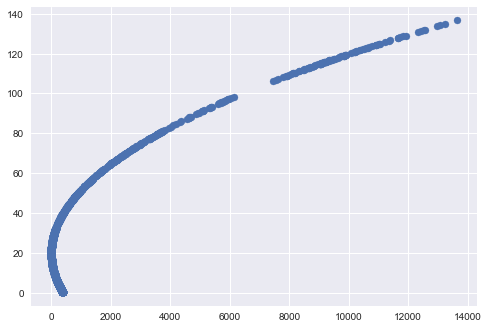

In [125]:
plt.scatter((stock.Close - stock.Close.mean()) **2, stock.Close)